In [1]:
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import numpy as np
import squarify 

In [2]:
url = 'https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv'
df = pd.read_csv(url)

In [3]:
df

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623


# Lec 1

використайте всі 3 бібліотеки (для 1 завдання потрібна тільки 1 бібліотека)

виведіть перші 2 записи датасету

In [4]:
df.iloc[:2]

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030


виведіть опис датафрейму (статистичні метрики одночасно по всіх колонках)

In [5]:
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

скільки країн в датасеті?

In [6]:
len(list(df['country'].unique()))

142

в якої країни було найбільше населення в 1997 році?

In [7]:
df[df['year']==1997].sort_values('pop', ascending=False).iloc[0]['country']

'China'

середня тривалість життя в Африці на 2007 рік

In [8]:
df[df['continent']=='Africa']['lifeExp'].mean(axis=0)

48.86533012820508

в якій країні Європи найменший ВВП? (1992 рік)

In [9]:
df[(df.year == 1992) & (df.continent == 'Europe')].sort_values('gdpPercap', ascending=True).iloc[0]['country']

'Albania'

який % населення світу живе в Азії? (2007 рік)

In [10]:
df[df.continent == 'Asia']['pop'].sum() / df['pop'].sum()

0.6048186394977813

в якої країни світу найбільше зріс ВВП з 1952 по 2007 рік? 

в абсолюті:

In [11]:
ds1 = df[(df.year == 1952)]
ds2 = df[(df.year == 2007)]
merged = pd.merge(ds1, ds2, on='country',how='inner')
merged['Diff'] = merged['gdpPercap_y'] - merged['gdpPercap_x']
merged['Diff_percent'] = merged['gdpPercap_x'] / merged['gdpPercap_y']
merged[['country', 'Diff']].sort_values('Diff', ascending=False).iloc[0]['country']

'Singapore'

у відсотках:

In [12]:
merged[['country', 'Diff_percent']].sort_values('Diff_percent', ascending=False).iloc[0]['country']

'Congo, Dem. Rep.'

# Lec 2

побудуйте гістограму (bar chart) ВВП США (х - роки, у - розмір ВВП)

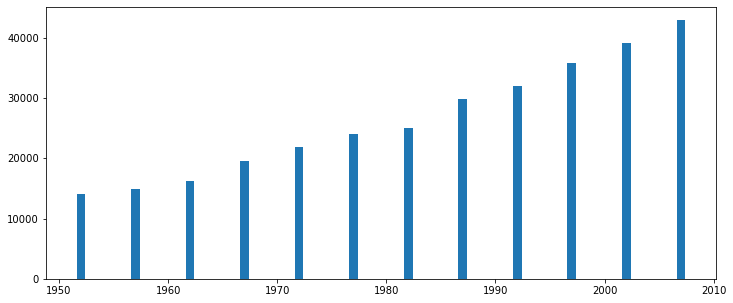

In [13]:
x = list(df[df.country == 'United States'].sort_values('year', ascending=True)['year'])
y = list(df[df.country == 'United States'].sort_values('year', ascending=True)['gdpPercap'])

fig = plt.figure(figsize = (12,5))
ax = fig.add_subplot()
ax.bar(x,y)
plt.show()

виведіть розподіл ВВП країн на 2007 рік

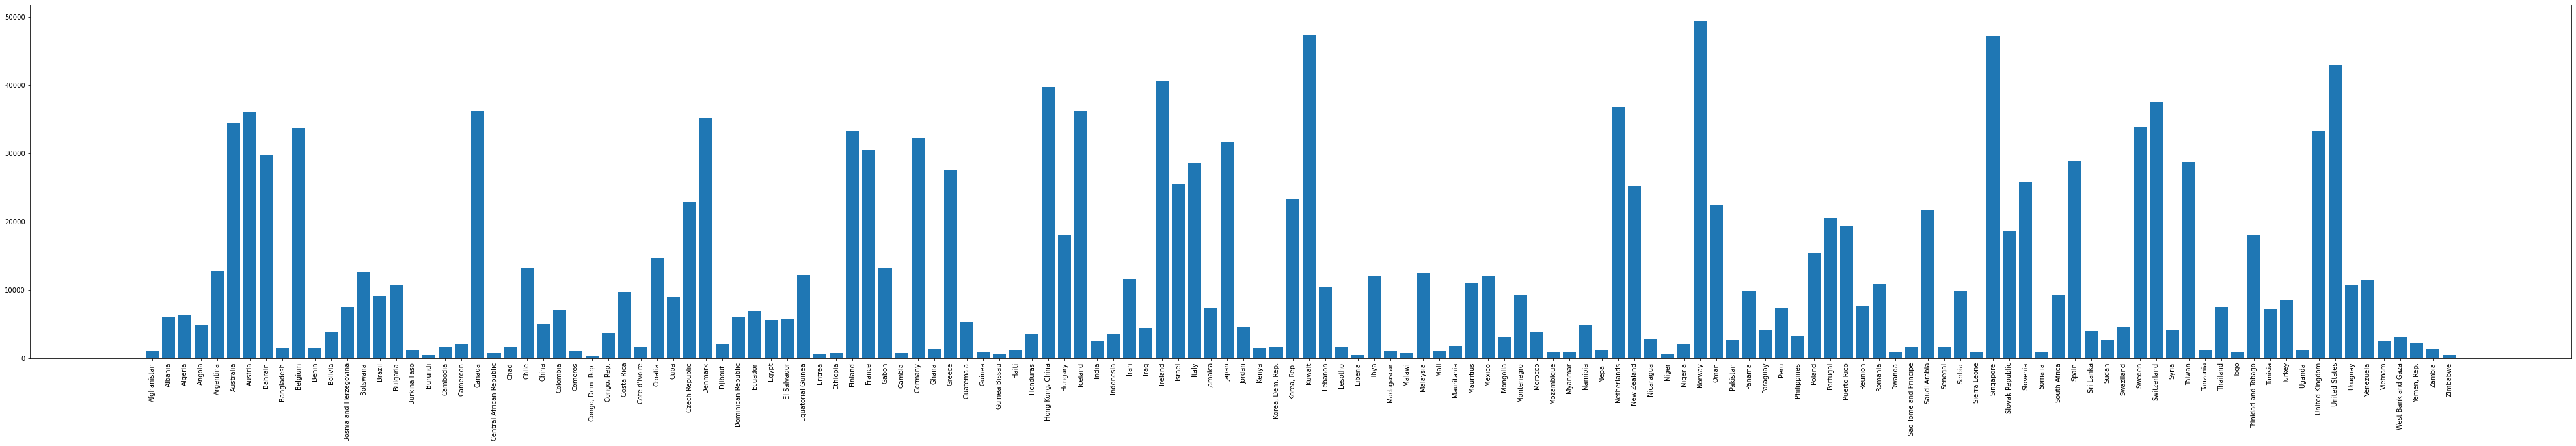

In [14]:
x = list(df[df.year == 2007]['country'])
y = list(df[df.year == 2007]['gdpPercap'])

fig = plt.figure(figsize = (70,10))
ax = fig.add_subplot()
ax.bar(x,y)
plt.xticks(rotation=90)
plt.show()

деревовидна діаграма (п. 33)

https://habr.com/ru/post/468295/

кількість населення по континентах на 2007 рік

<AxesSubplot:>

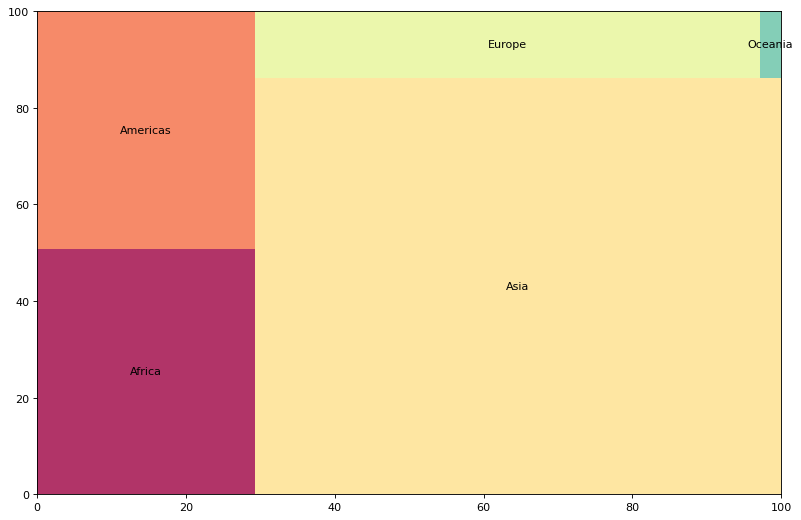

In [15]:
continents = list(df[df.year == 2007].groupby('continent')['pop'].sum().index)
pop_by_con = list(df[df.year == 2007].groupby('continent')['pop'].sum().values)
colors = [plt.cm.Spectral(i/float(len(continents))) for i in range(len(continents))]

plt.figure(figsize=(12,8), dpi=80)
squarify.plot(sizes=pop_by_con, label=continents, color=colors, alpha=.8)

*побудуйте графік:

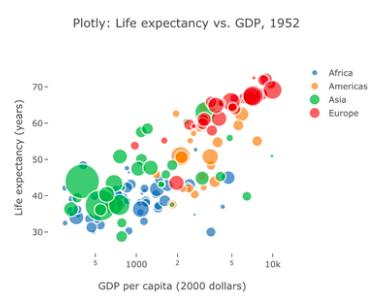

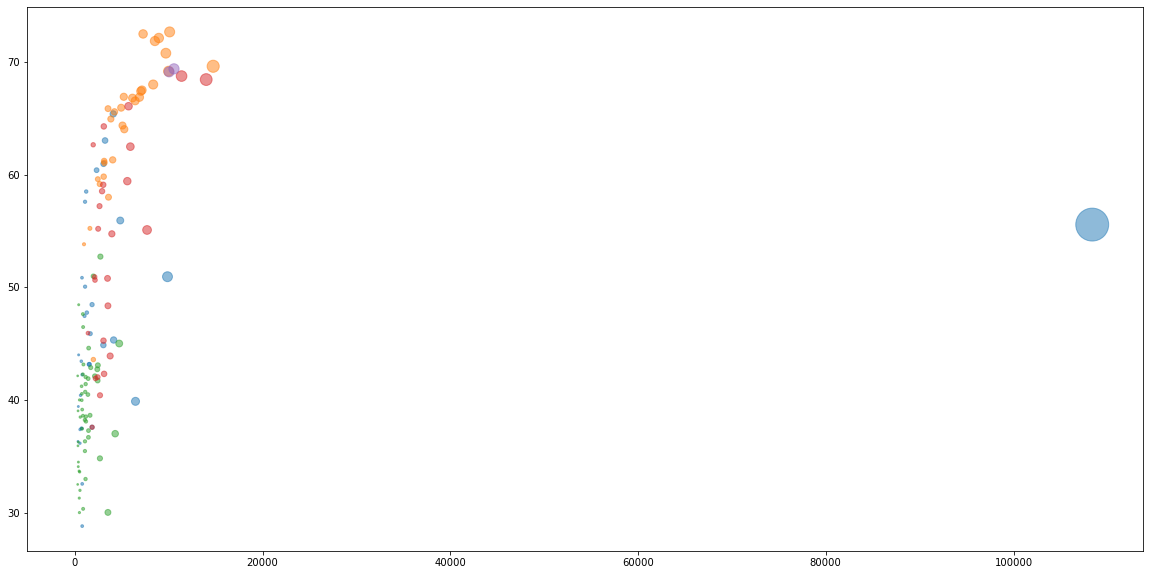

In [16]:
continents = list(df['continent'].unique())
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot()

for c in continents:
    life_exp = list(df[(df.year == 1952) & (df.continent == c)]['lifeExp'])
    gdp = list(df[(df.year == 1952) & (df.continent == c)]['gdpPercap'])
    sizes = df[(df.year == 1952) & (df.continent == c)]['gdpPercap']/100
    ax.scatter(gdp, life_exp, s=sizes, alpha=0.5)

In [17]:
import sys
print(sys.version)

3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
